# Introduction to neural network classification with TF

* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Binary Classification
Let's try to visualize the data

In [5]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


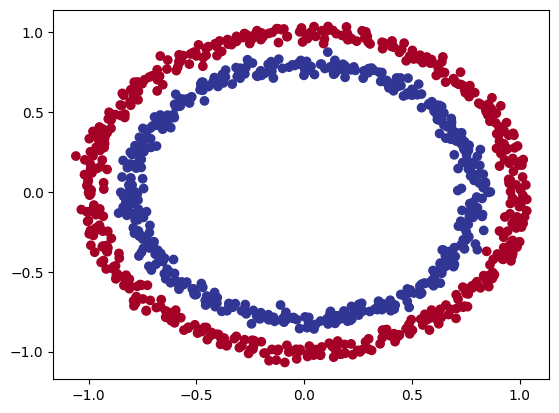

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c = y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
len(X), len(y)

(1000, 1000)

In [9]:
# first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

1. Create Model
2. Compile Model
3. Fit Model
4. Evaluate Model
5. Tweak
6. Evaluate...

In [17]:
# Set the random seed
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 5.2247 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 3.8848 - accuracy: 0.4700
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 7.0154 - accuracy: 0.4790
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


In [18]:
# Let's try to improve model

model_1.fit(X,y,epochs=200, verbose=0)

Let's add an extra layer

In [22]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics =["accuracy"])

model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7363 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7259 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7190 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.4940
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7114 - accuracy: 0.4950
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7089 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7066 - accuracy: 0.4940
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7049 - accuracy: 0.4940
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.5010
Epoch 11/

## Improving our model

1. Create a model - add more layers or hidden units
2. Compiling a model - choose different optimization function
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [26]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(X,y,epochs=100, verbose = 0)

In [27]:
# Evaluate
model_3.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.7016 - accuracy: 0.5100


[0.7015666365623474, 0.5099999904632568]

In [30]:
import numpy as np
def plot_decision_boudary(model, X, y):
  """
    Plots decision boundary created by a model predicting on X
  """
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min,y_max,100))
  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print("Multiclass")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred, cmap = plt.cm.RdYlBu, alpha =0.7)
  plt.scatter(X[:,0],X[:,1], c =y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 941us/step
Binary


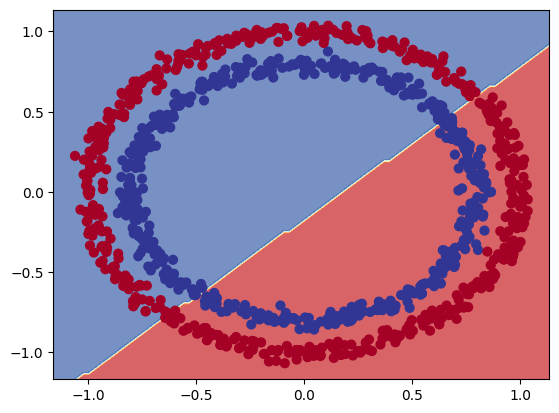

In [31]:
plot_decision_boudary(model_3, X, y)

In [35]:
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100, 1100,5) # y = X + 100

# Split regression data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])
model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 396.3874 - mae: 396.3874
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 300.6041 - mae: 300.6041
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 207.4019 - mae: 207.4019
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 109.3578 - mae: 109.3578
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 48.0855 - mae: 48.0855
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 76.4878 - mae: 76.4878
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 66.1602 - mae: 66.1602
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.9980 - mae: 43.9980
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 48.2252 - mae: 48.2252
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.4555 - mae: 42.4555
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 7ms/step


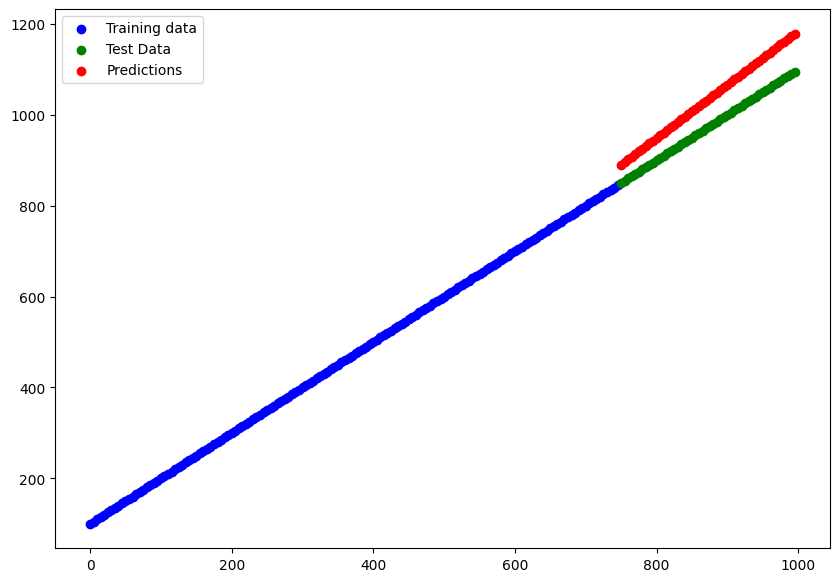

In [36]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label = "Test Data")
plt.scatter(X_reg_test,y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity